In [47]:
#import data and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#data = pd.read_csv(r'C:\Users\jafer\OneDrive\Desktop\DataSciPortfolio\liftdata11302022.csv')
data = pd.read_csv(r'C:\Users\jafer\OneDrive\Desktop\CS-Projects\DATASCIPROJ1\liftdata2012023.csv')

In [48]:
dates = data.values.T[0].tolist()
workoutTimeOfDay = data.values.T[1].tolist()
duration = data.values.T[2].tolist()
ExerciseName = data.values.T[3].tolist()
SetOrder = data.values.T[4].tolist()
Weight = data.values.T[5].tolist()
Reps = data.values.T[6].tolist()

In [49]:
uniquedates = []
index = 0
count = 0
for i in range(len(dates)):
    if i < (len(dates)-1):
        if dates[i] != dates[i+1]:
            try:
                uniquedates.append(i)
            except:
                print(i)
            count = count + 1
print("The amount of workouts completed are: " + str(count+1))


The amount of workouts completed are: 60


The average amount of sets of your workouts are: 16.05


Text(0, 0.5, 'Number of Sets')

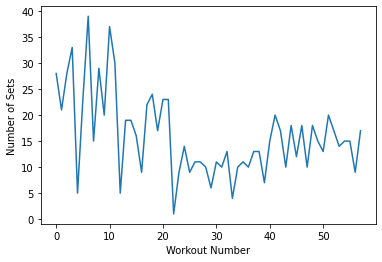

In [50]:
#Make graph of duration of workout in total amount of sets
#Use npworkouts from above cell
workoutSets = []
#Makes new list containing duration of x workouts
for i in range(len(uniquedates)):
    if i != 0:
        dur = uniquedates[i] - uniquedates[i-1]
        workoutSets.append(dur)
#Find average duration (# of sets)
sum = 0
for i in workoutSets:
    sum = sum + i
average = sum/len(workoutSets)
print("The average amount of sets of your workouts are: {0:.2f}".format(average))
#Make a chart
plt.plot(workoutSets, )
plt.xlabel("Workout Number")
plt.ylabel("Number of Sets")


In [51]:
bpperformed_barbell = 0
squat_barbell = 0
deadlift_barbell = 0
for i in ExerciseName:
    if i == 'Bench Press (Barbell)':
        bpperformed_barbell +=1
    if i == 'Squat (Barbell)':
        squat_barbell +=1
    if i == "Deadlift (Barbell)":
        deadlift_barbell +=1
print("amount of bench press barbell sets performed : " + str(bpperformed_barbell))
print("percentage of bench press barbell sets performed : {0:.2f}".format((bpperformed_barbell/len(ExerciseName))*100))
print("amount of squat barbell sets performed : " + str(squat_barbell))
print("percentage of squat barbell sets performed : {0:.2f}".format((squat_barbell/len(ExerciseName))*100))
print("amount of deadlift sets performed : " + str(deadlift_barbell))
print("percentage of deadlift sets performed : {0:.2f}".format((deadlift_barbell/len(ExerciseName))*100))


amount of bench press barbell sets performed : 195
percentage of bench press barbell sets performed : 20.23
amount of squat barbell sets performed : 186
percentage of squat barbell sets performed : 19.29
amount of deadlift sets performed : 67
percentage of deadlift sets performed : 6.95


36.4 :  Is the number of hours spent lifting.


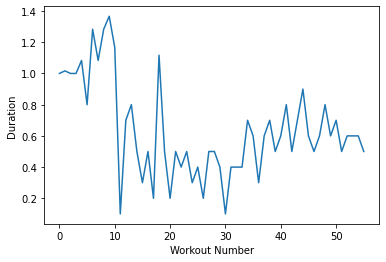

In [52]:
iterations = 0
hourslist= []
hours = 0
minutes = 0
for i in duration:
    if iterations != 0:
        if duration[iterations] != duration[iterations-1]:
            #Sum data formatted as singular hour with no minute add on "1h"
            if len(i) == 2 and i[1] != 'm':
                hours += int(i[0])
                hourslist.append(int(i[0]))
            #Sum data formatted as singular minute with no add-ons "8m"
            elif len(i) == 2 and i[1] != 'h' and i[1] == 'm':
                minutes += int(i[0])
                hourslist.append(round((int(i[0])/60), 1))
            #Sum data formatted as value-minutes with no hour "add-on" "55m"
            elif len(i) == 3 and i[2] != 'h' and i[2] != 's':
                minutes += int(i[:2])
                hourslist.append(round((int(i[:2])/60), 1))
            elif len(i) > 3 and i[1] == 'h':
                if len(i) == 5: #formatted "1h 1m"
                    hours += int(i[0])
                    minutes += int(i[3])
                    hourslist.append(int(i[0])+(int(i[3])/60))
                elif len(i) == 6: #formatted as "1h 10m"
                    hours += int(i[0])
                    minutes += int(i[3:5])
                    hourslist.append(int(i[0]) + (int(i[3:5])/60))
    else:
        minutes += 55
    iterations += 1
plt.plot(hourslist, )
plt.xlabel("Workout Number")
plt.ylabel("Duration")
print("{0:.1f} :  Is the number of hours spent lifting.".format(hours + minutes/60))


In [53]:
#try to calculate total pounds
nppounds = np.array(Weight)#[data.values.T[5].tolist()])
npreps = np.array(Reps)#[data.values.T[4].tolist()])

#calculates poundage of non-bodyweight exercises
nptotalpounds = nppounds * npreps
totalpounds = np.sum(nptotalpounds)
print("Your total pounds lifted is: " + str(totalpounds))

#calculates poundage of bodyweight exercises
bodyweightsets = 0
index = 0
indexes_of_npsets =[]
for i in nppounds:
    if i == 0:
        bodyweightsets +=1
        indexes_of_npsets.append(index)
    index+=1

bodyweightpounds = bodyweightsets * 150 #mean bodyweight for individual
print("Your total bodyweight sets are : {0:.0f} \nand your total bodyweight pounds lifted are : {1:.1f}".format(bodyweightsets, bodyweightpounds))

Your total pounds lifted is: 554250
Your total bodyweight sets are : 153 
and your total bodyweight pounds lifted are : 22950.0
